In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
df=pd.read_csv("employee (1).csv")
df.head()

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,Sales,Analyst,Onsite,Yes,Yes,Low,Medium,Low,Weak,Yes,Poor,No
1,HR,Analyst,Onsite,No,No,Medium,Medium,High,Weak,No,Excellent,Yes
2,HR,Manager,Remote,No,No,High,High,Low,Strong,Yes,Poor,No
3,Marketing,Analyst,Onsite,Yes,Yes,Medium,Low,High,Average,Yes,Average,Yes
4,IT,Assistant,Hybrid,No,Yes,Medium,High,Low,Weak,Yes,Average,No


In [15]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=LabelEncoder().fit_transform(df[i])
df

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,4,0,1,1,1,1,2,1,2,1,3,0
1,1,0,1,0,0,2,2,0,2,0,1,1
2,1,4,2,0,0,0,0,1,1,1,3,0
3,3,0,1,1,1,2,1,0,0,1,0,1
4,2,1,0,0,1,2,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,1,1,1,2,0,1,0,0,3,0
996,0,1,1,0,1,1,1,1,1,1,0,1
997,4,2,1,1,0,2,1,1,1,1,3,0
998,0,3,1,1,1,0,1,2,1,1,2,0


In [16]:
x=df.drop("Promoted",axis=1)
y=df["Promoted"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
model=BernoulliNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [19]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0])

In [20]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.43

In [21]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[37, 67],
       [47, 49]])

In [22]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.00377536, 0.00389194, 0.00503206, 0.00425434, 0.00503755]),
 'score_time': array([0.00201058, 0.00279903, 0.00201035, 0.00216365, 0.00178313]),
 'test_score': array([0.475, 0.445, 0.545, 0.53 , 0.455]),
 'train_score': array([0.55625, 0.55875, 0.5225 , 0.51875, 0.525  ])}

In [23]:
cla=classification_report(y_test,y_pred)
cla

'              precision    recall  f1-score   support\n\n           0       0.44      0.36      0.39       104\n           1       0.42      0.51      0.46        96\n\n    accuracy                           0.43       200\n   macro avg       0.43      0.43      0.43       200\nweighted avg       0.43      0.43      0.43       200\n'

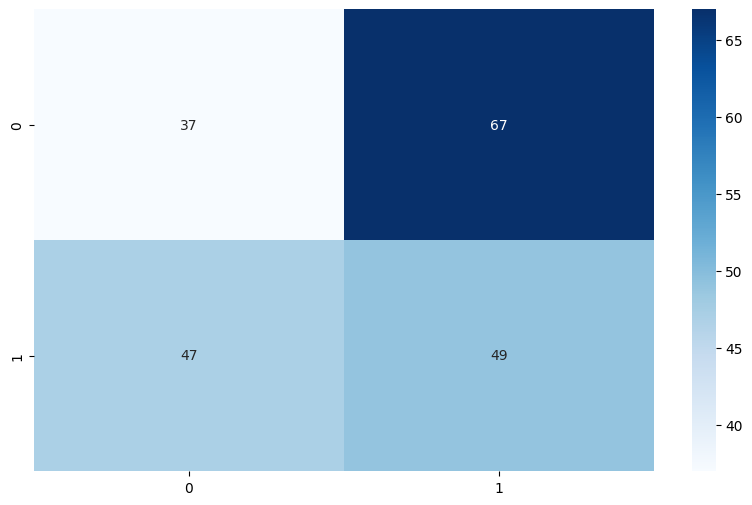

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.show()